In [26]:
# aivietnam.ai - advertising
import numpy as np
# from numpy import genfromtxt
import matplotlib.pyplot as plt
import random
random.seed(0) # please do not remove this line
%matplotlib inline

def load_data_from_file(fileName = "advertising.csv"):
  data = np.genfromtxt(fileName, dtype=None, delimiter=',', skip_header=1)
  features_X = data[:, :3]
  sales_Y = data[:, 3]

  # **************** your code here ****************
  features_X = np.insert(features_X, 0, 1, axis=1)
  # sales_Y = np.insert(sales_Y, 0, 1, axis=0)


  return features_X, sales_Y


In [21]:
#Question 2
features_X, _ = load_data_from_file()
print(features_X[:5,:])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [28]:
#Question 3
_, sales_Y = load_data_from_file()
print(sales_Y.shape)

(200,)


In [29]:
def generate_random_value(bound = 10):
    return (random.random() - 0.5)*bound

def create_individual(n=4, bound=10):
    individual = []
  # **************** your code here ****************
    individual = [generate_random_value() for _ in range(n)]
    return individual

In [31]:
individual = create_individual()
print(individual)

[0.1127472136860852, -0.9506586254958571, 2.837985890347726, -1.9668727392107255]


In [32]:
def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_X.dot(theta)
    loss  = np.multiply((y_hat-sales_Y), (y_hat-sales_Y)).mean()
    return loss

def compute_fitness(individual):

    # **************** your code here ****************
    loss = compute_loss(individual)
    fitness = 1/loss
    return fitness

In [33]:
#question 4
features_X, sales_Y = load_data_from_file()
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0186001912541925e-06


In [44]:
def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()


   # **************** your code here ****************

    if crossover_rate >= 1.0 or random.random() < crossover_rate:
        crossover_point = random.randint(1, len(individual1) - 1)
        individual1_new[crossover_point:] , individual2_new[crossover_point:] = (
            individual2[crossover_point:], individual1[crossover_point:]
        )

    return individual1_new, individual2_new

In [45]:
#question 5
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]

individual1, individual2 = crossover(individual1, individual2, 2.0)
print("individual1: ", individual1)
print("individual2: ", individual2)

individual1:  [4.09, 2.57, -0.79, -2.41]
individual2:  [3.44, 4.82, 3.1, 4.02]


In [46]:
def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()

    # **************** your code here ****************
    for i in range(len(individual_m)):
        if random.random() < mutation_rate:
            individual_m[i] = generate_random_value()

    return individual_m

In [47]:
#Question 6
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate = 2.0)
print(before_individual == after_individual)

False


In [48]:
def initializePopulation(m):
  population = [create_individual() for _ in range(m)]
  return population

In [49]:
population = initializePopulation(100)
print(len(population))

100


In [50]:
def selection(sorted_old_population, m):
    index1 = random.randint(0, m-1)
    while True:
        index2 = random.randint(0, m-1)
        if (index2 != index1):
            break

    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]

    return individual_s

In [52]:
population = initializePopulation(m=100)
individual_s = selection(population, m = 100)
print(individual_s)

[0.29272001357831146, -1.5971962074881985, 4.784545513570128, 4.718665573793185]


In [53]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)

    if gen%1 == 0:
        print("Best loss:", compute_loss(sorted_population[m-1]), "with chromsome: ", sorted_population[m-1])

    new_population = []
    while len(new_population) < m-elitism:
        # selection
         # **************** your code here ****************
        individual_s1 = selection(sorted_population, m)
        individual_s2 = selection(sorted_population, m)

        # crossover
        # **************** your code here ****************
        individual_c1, individual_c2 = crossover(individual_s1, individual_s2)
        # mutation
        # **************** your code here ****************

        individual_c1 = mutate(individual_c1)
        individual_c2 = mutate(individual_c2)
        new_population.extend([individual_c1, individual_c2])

        # copy elitism chromosomes that have best fitness score to the next generation
    for ind in sorted_population[m-elitism:]:
         # **************** your code here ****************
         new_population.append(ind)


    return new_population, compute_loss(sorted_population[m-1])

In [54]:
#Question 7
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population, _ = create_new_population(old_population, elitism=2, gen=1)


Best loss: 123415.051528805 with chromsome:  [3.44, 2.57, -0.79, -2.41]


In [55]:
def run_GA():
  n_generations = 100
  m = 600
  features_X, sales_Y = load_data_from_file()
  population = initializePopulation(m)
  losses_list = []
  for i in range(n_generations):

    # *********** your code here *************
    population, loss = create_new_population(population, elitism=2, gen=i)
    losses_list.append(loss)
  return losses_list


In [57]:
losses_list = run_GA()

Best loss: 623.5217464006777 with chromsome:  [-4.51833373785118, -0.11936658632484387, 1.4381543118903795, -0.1572681068729609]
Best loss: 372.15917730364635 with chromsome:  [-0.7662360189759754, -0.06687890662371632, -0.16423832129518923, 0.7345772178458765]
Best loss: 372.15917730364635 with chromsome:  [-0.7662360189759754, -0.06687890662371632, -0.16423832129518923, 0.7345772178458765]
Best loss: 209.48967404834647 with chromsome:  [0.9354717556162095, 0.17431090402554306, 0.04620794946786022, -0.08339903914447389]
Best loss: 177.18163266601277 with chromsome:  [0.9354717556162095, 0.17431090402554306, 0.04620794946786022, -0.1572681068729609]
Best loss: 177.18163266601277 with chromsome:  [0.9354717556162095, 0.17431090402554306, 0.04620794946786022, -0.1572681068729609]
Best loss: 102.01032083916729 with chromsome:  [3.940825433316386, 0.09834314177857295, -0.3739621963198292, 0.3248764603186116]
Best loss: 87.807192972831 with chromsome:  [1.897674544455088, 0.0983431417785729

Best loss: 874.1421656692714 with chromsome:  [-1.5132197104758205, 0.25069264869945873, 0.8828629177902791, -1.201366550527595]
Best loss: 213.2434845263735 with chromsome:  [1.5265631962164772, -0.035275996117106745, -0.1401298134103457, 0.4264550373584486]
Best loss: 213.2434845263735 with chromsome:  [1.5265631962164772, -0.035275996117106745, -0.1401298134103457, 0.4264550373584486]
Best loss: 98.90187977112404 with chromsome:  [1.1989789739223977, 0.05922091940913643, -0.1401298134103457, 0.4264550373584486]
Best loss: 98.90187977112404 with chromsome:  [1.1989789739223977, 0.05922091940913643, -0.1401298134103457, 0.4264550373584486]
Best loss: 98.90187977112404 with chromsome:  [1.1989789739223977, 0.05922091940913643, -0.1401298134103457, 0.4264550373584486]
Best loss: 98.90187977112404 with chromsome:  [1.1989789739223977, 0.05922091940913643, -0.1401298134103457, 0.4264550373584486]
Best loss: 83.58835764064979 with chromsome:  [2.4410702764288317, 0.022760990955822402, -0.1

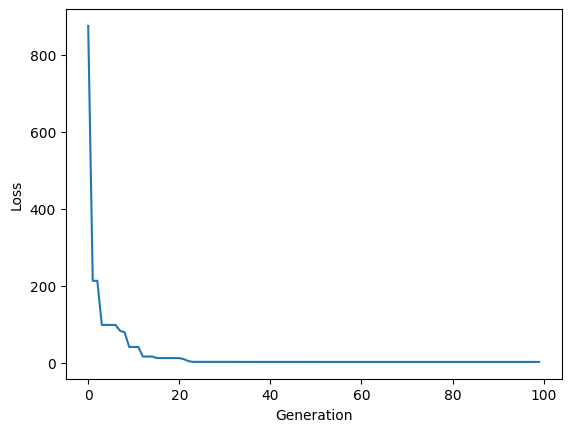

In [61]:
import matplotlib.pyplot as plt

def visualize_loss(losses_list):

      # *********** your code here *************
      plt.plot(losses_list)
      plt.xlabel('Generation')
      plt.ylabel('Loss')
      plt.show()

losses_list = run_GA()
visualize_loss(losses_list)

[4.7575657946441225, 0.1047451787612319, -4.235437949331048, 2.6504061524945666]


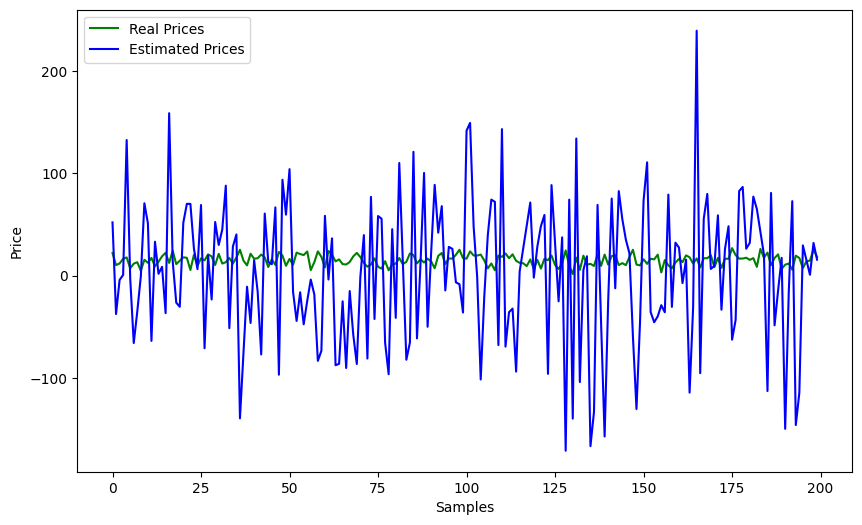

In [63]:
def visualize_predict_gt():
  # visualization of ground truth and predict value
  sorted_population = sorted(population, key=compute_fitness)
  print(sorted_population[-1])
  theta = np.array(sorted_population[-1])

  estimated_prices = []
  for feature in features_X:
     # ************* your code here *************
     estimated_price = sum(c*x for x, c in zip(feature, theta))
     estimated_prices.append(estimated_price)

  fig, ax = plt.subplots(figsize=(10, 6))
  plt.xlabel('Samples')
  plt.ylabel('Price')
  plt.plot(sales_Y, c='green', label='Real Prices')
  plt.plot(estimated_prices, c='blue', label='Estimated Prices')
  plt.legend()
  plt.show()

visualize_predict_gt()

[-1.4692891827648635, -0.4170567502126088, 1.318794317305464, 0.16124298167449536]


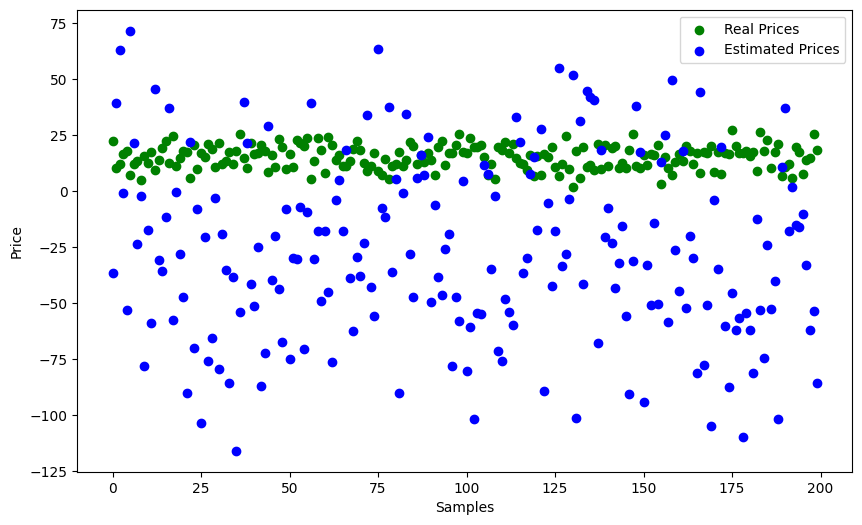

In [ ]:
# visualization of ground truth and predict value
sorted_population = sorted(population, key=compute_fitness)
print(sorted_population[-1])
theta = np.array(sorted_population[-1])

estimated_prices = []
samples = [i for i in range(len(features_X))]
for feature in features_X:
    estimated_price = sum(c*x for x, c in zip(feature, theta))
    estimated_prices.append(estimated_price)
fig, ax = plt.subplots(figsize=(10, 6))
# plt.plot(prices, c='green')
# plt.plot(estimated_prices, c='red')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.scatter(samples, sales_Y, c='green', label='Real Prices')
plt.scatter(samples, estimated_prices, c='blue', label='Estimated Prices')
plt.legend()
plt.show()